#  EDA ANALYSIS OF VADIO GAMES SALES

In [1]:
#importing Required library 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Reading


In [2]:
sat=pd.read_csv("vgsales.csv")

In [5]:
sat.shape

(16598, 11)

In [6]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [3]:
sat.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Data cleaning

In [4]:
sat.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [3]:
sat.drop('Year',axis=1,inplace = True)
sat.drop('Publisher',axis=1,inplace = True)

In [9]:
sat.head()

,Rank,Name,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,Sports,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,Racing,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,Sports,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,Role-Playing,11.27,8.89,10.22,1.00,31.37


In [12]:
sat.tail(3)

,Rank,Name,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16595,16598,SCORE International Baja 1000: The Official Game,PS2,Racing,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,Puzzle,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,Platform,0.01,0.00,0.0,0.0,0.01


### Data information 

In [13]:
sat.describe()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [6]:
sat['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

#### looking for any Outliers available  

<AxesSubplot:>

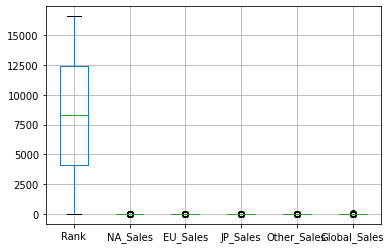

In [14]:
sat.boxplot() 

array([[<AxesSubplot:title={'center':'Rank'}>,
        <AxesSubplot:title={'center':'NA_Sales'}>],
       [<AxesSubplot:title={'center':'EU_Sales'}>,
        <AxesSubplot:title={'center':'JP_Sales'}>],
       [<AxesSubplot:title={'center':'Other_Sales'}>,
        <AxesSubplot:title={'center':'Global_Sales'}>]], dtype=object)

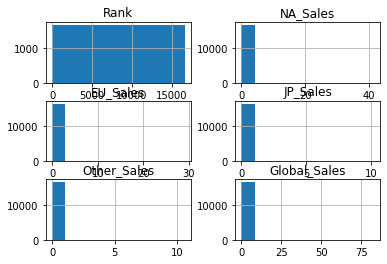

In [15]:
sat.hist()

### Data Visulation 

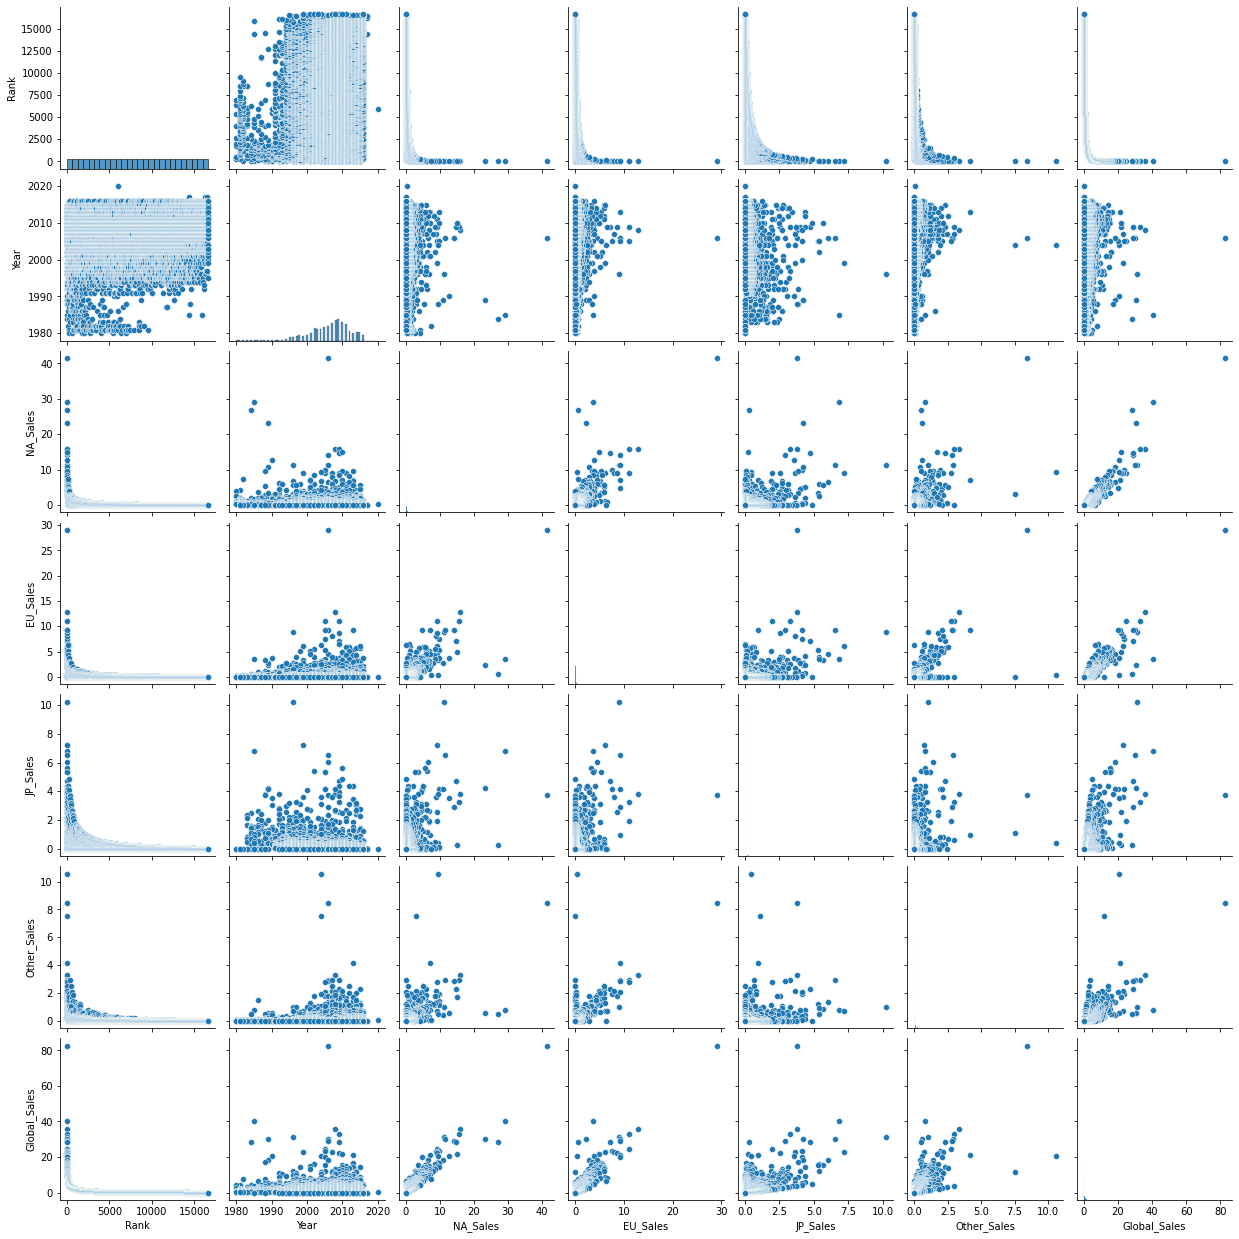

In [25]:
sns.pairplot(sat)    # all information in one block

#### Relationship analysis 

In [23]:
cor= sat.corr()   

<AxesSubplot:>

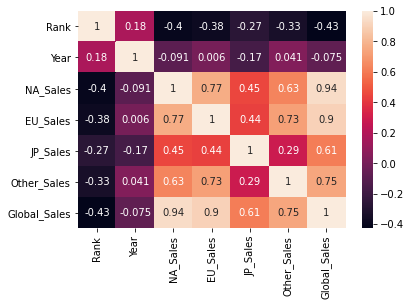

In [24]:
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)

In [8]:
grp = sat.groupby('Genre')
a = grp['NA_Sales'].agg(np.sum)
b = grp['EU_Sales'].agg(np.sum)
c = grp['JP_Sales'].agg(np.sum)
d = grp['NA_Sales'].agg(np.sum)
e = grp['Global_Sales'].agg(np.sum)
print(a)
print(b)
print(c)
print(d)
print(e)

Genre
Action          877.83
Adventure       105.80
Fighting        223.59
Misc            410.24
Platform        447.05
Puzzle          123.78
Racing          359.42
Role-Playing    327.28
Shooter         582.60
Simulation      183.31
Sports          683.35
Strategy         68.70
Name: NA_Sales, dtype: float64
Genre
Action          525.00
Adventure        64.13
Fighting        101.32
Misc            215.98
Platform        201.63
Puzzle           50.78
Racing          238.39
Role-Playing    188.06
Shooter         313.27
Simulation      113.38
Sports          376.85
Strategy         45.34
Name: EU_Sales, dtype: float64
Genre
Action          159.95
Adventure        52.07
Fighting         87.35
Misc            107.76
Platform        130.77
Puzzle           57.31
Racing           56.69
Role-Playing    352.31
Shooter          38.28
Simulation       63.70
Sports          135.37
Strategy         49.46
Name: JP_Sales, dtype: float64
Genre
Action          877.83
Adventure       105.80
Fighting 

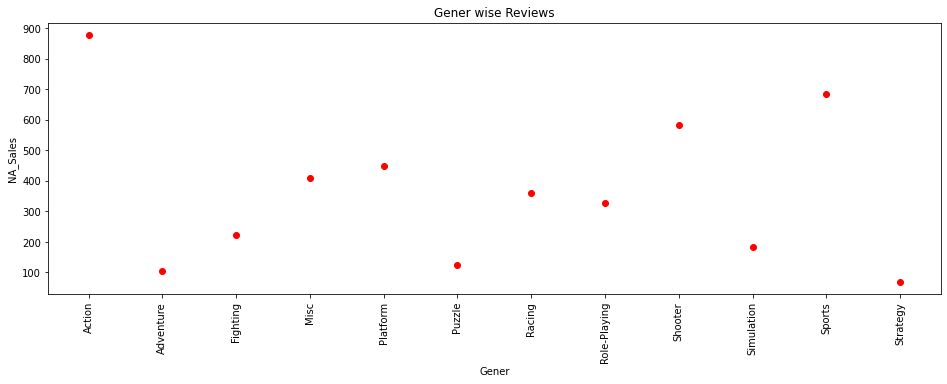

In [11]:
plt.figure(figsize=(16,5))
plt.plot(a,'ro', color='r')
plt.xticks(rotation=90)
plt.title('Gener wise Reviews')
plt.xlabel('Gener')
plt.ylabel('NA_Sales')
plt.show()

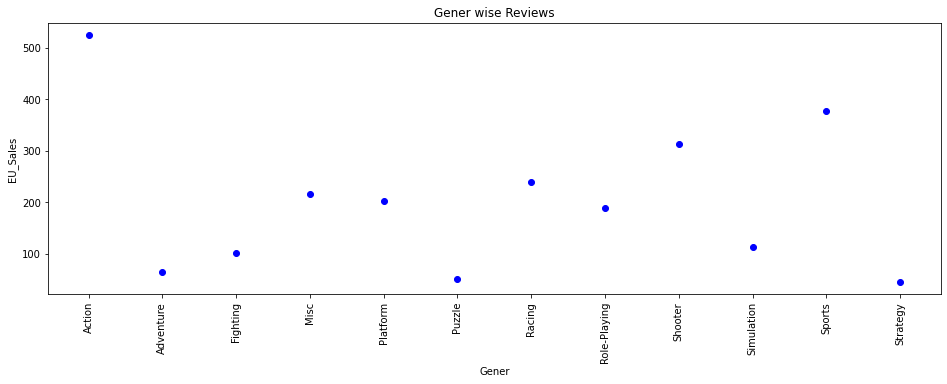

In [12]:
plt.figure(figsize=(16,5))
plt.plot(b,'ro', color='b')
plt.xticks(rotation=90)
plt.title('Gener wise Reviews')
plt.xlabel('Gener')
plt.ylabel('EU_Sales')
plt.show()

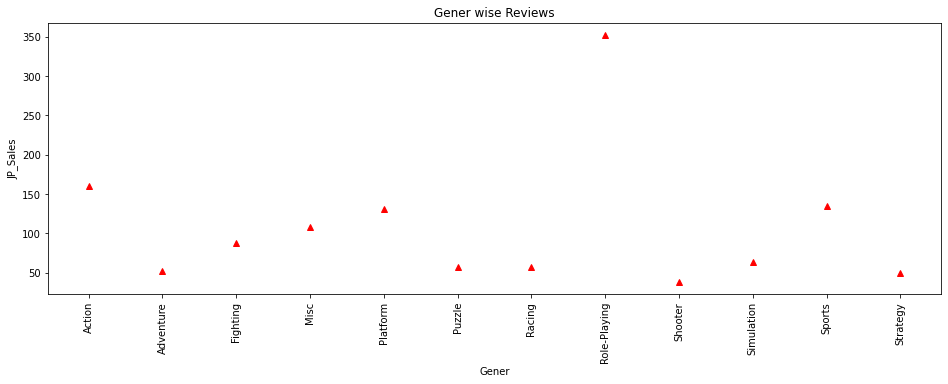

In [13]:
plt.figure(figsize=(16,5))
plt.plot(c,'r^', color='r')
plt.xticks(rotation=90)
plt.title('Gener wise Reviews')
plt.xlabel('Gener')
plt.ylabel('JP_Sales')
plt.show()

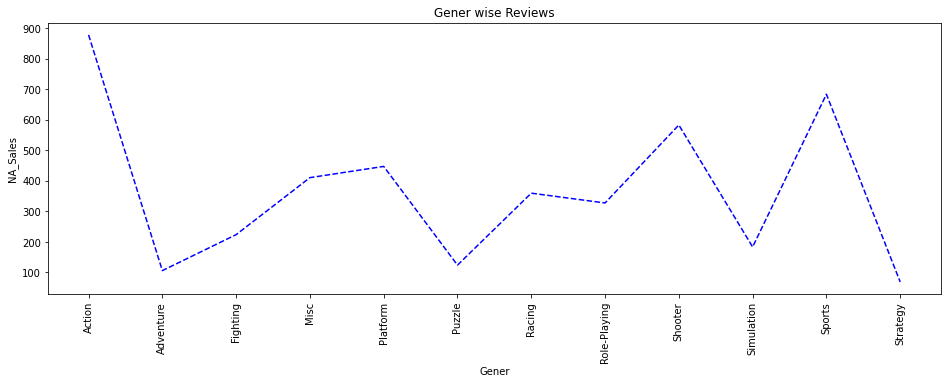

In [18]:
plt.figure(figsize=(16,5))
plt.plot(d,'r--', color='b')
plt.xticks(rotation=90)
plt.title('Gener wise Reviews')
plt.xlabel('Gener')
plt.ylabel('NA_Sales')
plt.show()

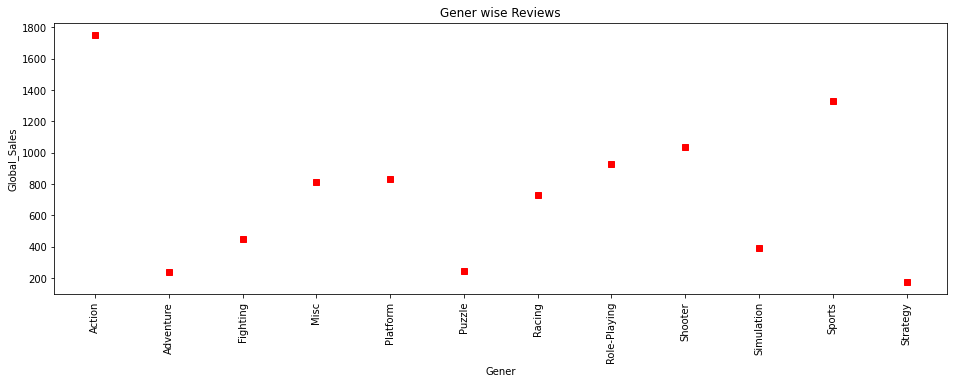

In [26]:
plt.figure(figsize=(16,5))
plt.plot(e,'bs', color='r')
plt.xticks(rotation=90)
plt.title('Gener wise Reviews')
plt.xlabel('Gener')
plt.ylabel('Global_Sales')
plt.show()

In [11]:
d = sat.iloc[0]
d

Rank             1.00
NA_Sales        41.49
EU_Sales        29.02
JP_Sales         3.77
Other_Sales      8.46
Global_Sales    82.74
Name: 0, dtype: float64

<AxesSubplot:ylabel='0'>

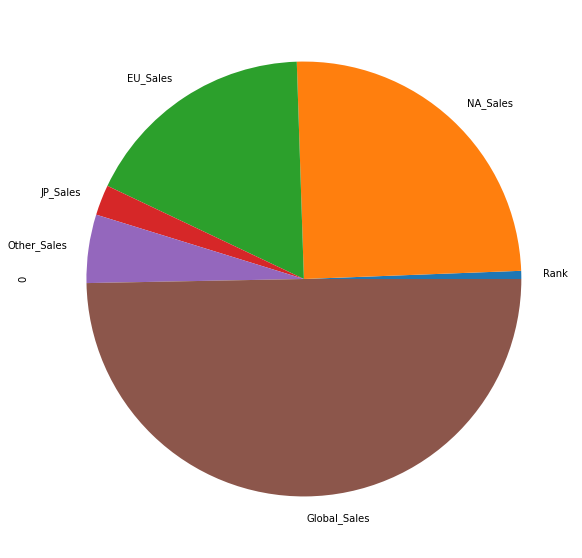

In [12]:
d.plot.pie(figsize = (10,10))